In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *
from sklearn import datasets
from sklearn.model_selection import train_test_split
from termcolor import colored
from sklearn.utils import shuffle
import math

# Visualisation of true and noisy function

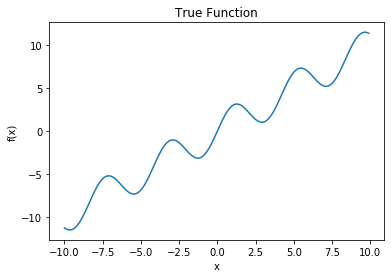

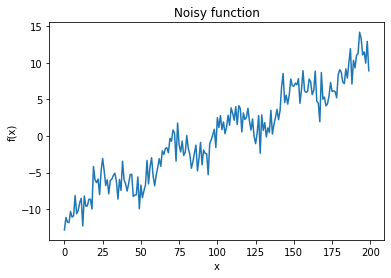

In [79]:
x = np.arange(-10, 10, 0.1)
f = x + 2*np.sin(1.5*x)
plt.plot(x, f)
plt.title('True Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

noise = np.random.normal(0, math.sqrt(2), len(x))
f_noisy = f + noise
plt.plot(f_noisy)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Noisy function')
plt.show()

# Simple Hypothesis

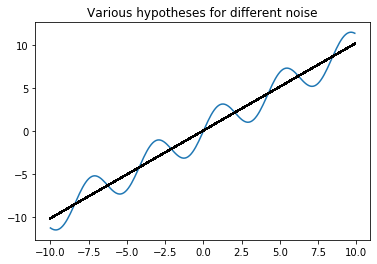

In [80]:
expected_hypo = 0
var = 0 
tmp = np.ones(len(x))
plt.plot(x, f)
hypo_list = []
f_noisy = f + np.random.normal(0, math.sqrt(2), len(x))
X = np.c_[tmp, x]
for i in range(1000):
    theta = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, f_noisy))
    y_est = theta[0] + theta[1]*x
    plt.plot(x, y_est, color='black')
    expected_hypo+=y_est
    hypo_list.append(y_est)
hypo_list = np.array(hypo_list)
expected_hypo/=1000
plt.title('Various hypotheses for different noise')
plt.show()

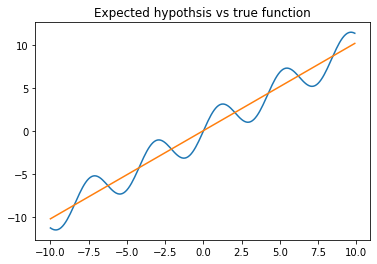

In [42]:
plt.plot(x, f)
plt.plot(x, expected_hypo)
plt.title('Expected hypothsis vs true function')
plt.show()

### Prove that MSE = bias^2 + variance

In [81]:
bias = np.absolute(expected_hypo - f)
var = np.mean((hypo_list - expected_hypo)**2, axis=0)

MSE = (f - expected_hypo)**2

print("MSE = bias**2 + var\n")
print("Difference between MSE and bias**2 + variance")
print(np.mean(MSE - bias**2 - var))

MSE = bias**2 + var

Difference between MSE and bias**2 + variance
-5.980749758212559e-27


### As we can see below, norm of bias is high and norm of variance is low for simple hypothesis

In [82]:
print("Norm of bias : {}".format(np.linalg.norm(bias)))
print("Norm of variance : {}".format(np.linalg.norm(var)))

Norm of bias : 20.191418468369502
Norm of variance : 1.5382604872866217e-25


# Complex Hypothesis

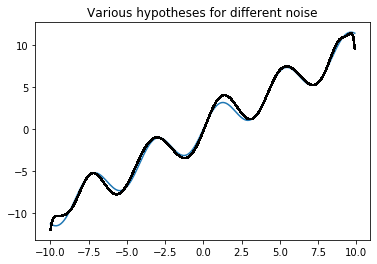

In [97]:
X = np.c_[np.ones(len(x)),x,np.power(x,2),np.power(x,3),np.power(x,4),np.power(x,5),np.power(x,6),np.power(x,7),np.power(x,8),np.power(x,9),np.power(x,10),np.power(x,11),np.power(x,12),np.power(x,13),np.power(x,14),np.power(x,15),np.power(x,16),np.power(x,17),np.power(x,18),np.power(x,19),np.power(x,20)]
f_noisy = f + np.random.normal(0, math.sqrt(2), len(x))
plt.plot(x, f)
hypo_list = []
expected_hypo = 0
for i in range(1000):
    theta = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, f_noisy))
    y_est = np.dot(X, theta)
    plt.plot(x, y_est, color='black')
    expected_hypo+=y_est
    hypo_list.append(y_est)
expected_hypo/=1000
hypo_list = np.array(hypo_list)
plt.title('Various hypotheses for different noise')
plt.show()

In [103]:
bias = np.absolute(expected_hypo - f)
var = np.mean((hypo_list - expected_hypo)**2, axis=0)
MSE = (f - expected_hypo)**2

print("MSE = bias**2 + var\n")
print("Difference between MSE and bias**2 + variance")
print(np.mean(MSE - bias**2 - var))

MSE = bias**2 + var

Difference between MSE and bias**2 + variance
-2.0079731309781134e-27


In [101]:
print("Norm of bias : {}".format(np.linalg.norm(bias)))
print("Norm of variance : {}".format(np.linalg.norm(var)))

Norm of bias : 6.227799227415425
Norm of variance : 8.759712040031504e-26
